In ABC Shirt company, they have asked the marketing manager to evaluate between the different scenarios that the company is planning and decide the best one amongst them to maximize the units sold.

The different scenarios involve different strategies for pricing, advertising expenditure, and
Promotional expenditure. They have traditionally used gut-based decision-making to do these projects but now want to be more data-driven about these projections. 
 
 
Can you help the Sales manager to decide amongst the 3 scenarios? You would need to use linear regression to establish the relationship between Price, Advertisement and Promotion and Units sold.


## Assumption: There is a linear relationship between the independent x-variables (Price, Advertisement and Promotion) and the dependent y-variable Units sold.

In [2]:
import pandas as pd # for data analysis
import numpy as np # for numericaal analysis
import matplotlib.pyplot as plt # for data-viz
%matplotlib inline

import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/tshirt_sales.csv'

In [4]:
df = pd.read_csv(url) 

In [46]:
df.head()

,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2019,1,73959,8.75,50.04,61.13
1,2019,2,71544,8.99,50.74,60.19
2,2019,3,78587,7.50,50.14,59.16
3,2019,4,80364,7.25,50.27,60.38
4,2019,5,78771,7.40,51.25,59.71


In [6]:
df.columns

Index(['Year', 'Month', 'units_sold', 'dollar_price', 'advertisment',
       'promotions'],
      dtype='object')

In [7]:
df.isna().sum()

Year            0
Month           0
units_sold      0
dollar_price    0
advertisment    0
promotions      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24 non-null     int64  
 1   Month         24 non-null     int64  
 2   units_sold    24 non-null     int64  
 3   dollar_price  24 non-null     float64
 4   advertisment  24 non-null     float64
 5   promotions    24 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.2 KB


In [9]:
key_columns =  ['units_sold', 'dollar_price', 'advertisment','promotions']
df.head()

,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2019,1,73959,8.75,50.04,61.13
1,2019,2,71544,8.99,50.74,60.19
2,2019,3,78587,7.50,50.14,59.16
3,2019,4,80364,7.25,50.27,60.38
4,2019,5,78771,7.40,51.25,59.71


In [10]:
df[key_columns].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
units_sold,24.0,74258.29,3164.39,69003.00,71959.50,74103.00,76354.50,80364.00
dollar_price,24.0,8.13,0.51,7.25,7.90,8.15,8.43,8.99
advertisment,24.0,50.15,1.28,48.00,49.40,50.12,50.77,54.00
promotions,24.0,59.88,0.68,58.00,59.64,59.90,60.24,61.13


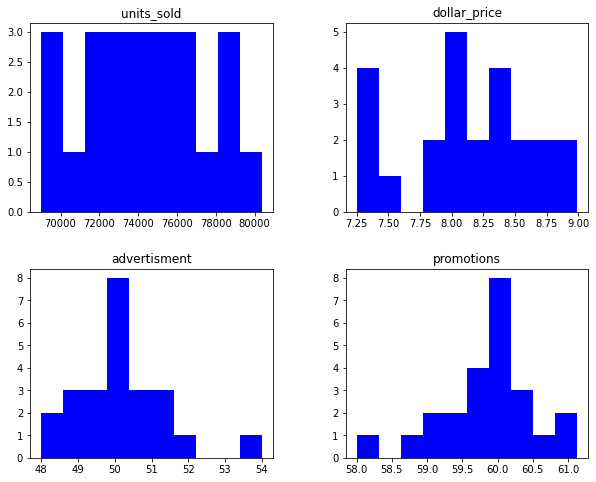

In [11]:
df[key_columns].hist(figsize = (10, 8), grid = False, color= 'blue');

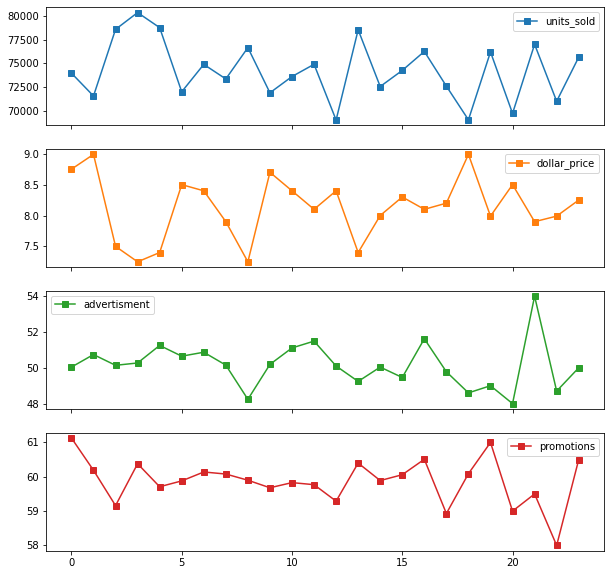

In [12]:
df[key_columns].plot.line(figsize = (10, 10), subplots=True, marker = 's');

## Let's look at the data to see if the above assumption is valid

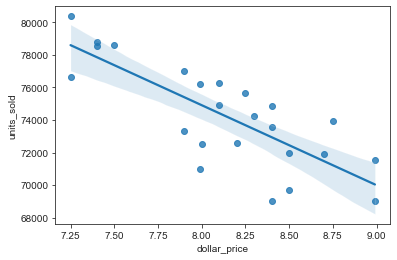

In [13]:
sns.set_style('white')  #no grid lines
sns.set_style('ticks')

sns.regplot(x = 'dollar_price', y = 'units_sold', data = df);

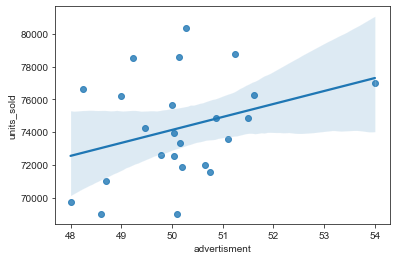

In [14]:
sns.regplot(x = 'advertisment', y = 'units_sold', data = df);

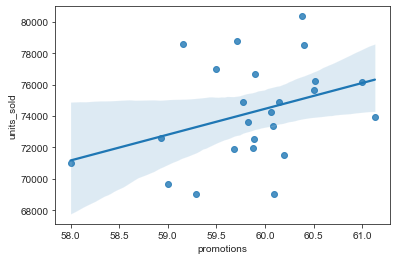

In [15]:
sns.regplot(x = 'promotions', y = 'units_sold', data = df);

### OK so... units_sold vs dollar price looks like it holds true to a linear relationship but the other 2 are questionable as their confidence interval shading is quite large. Let's look at the r-values to see the strength of each

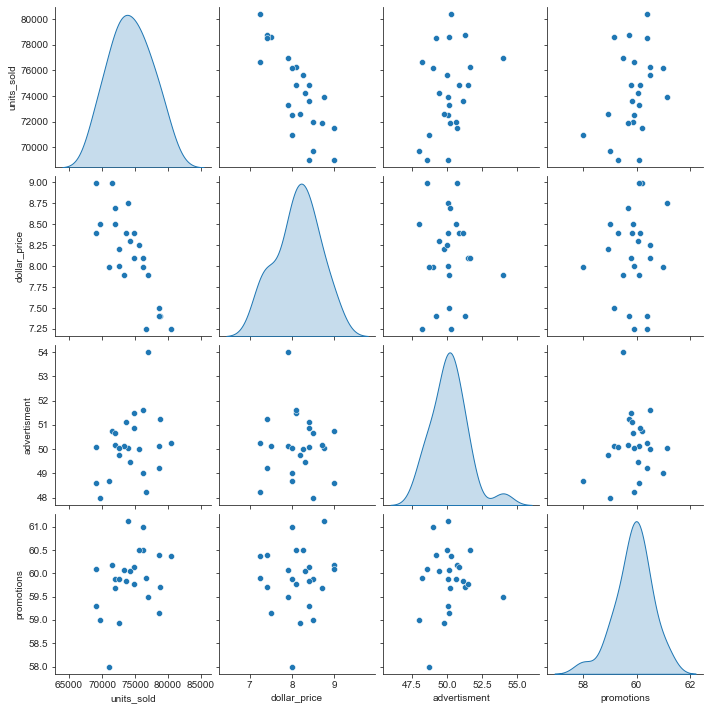

In [16]:
# sns.pairplot(df[key_columns]);
# sns.pairplot(df[key_columns], kind ='reg');
sns.pairplot(df[key_columns], diag_kind = 'kde');

                  Year     Month  units_sold  dollar_price  advertisment  \
Year          1.000000  0.866778   -0.252104      0.073925     -0.219616   
Month         0.866778  1.000000   -0.257635      0.074756     -0.161949   
units_sold   -0.252104 -0.257635    1.000000     -0.786759      0.320547   
dollar_price  0.073925  0.074756   -0.786759      1.000000     -0.023577   
advertisment -0.219616 -0.161949    0.320547     -0.023577      1.000000   
promotions   -0.167203 -0.276877    0.355050      0.074222      0.101075   

              promotions  
Year           -0.167203  
Month          -0.276877  
units_sold      0.355050  
dollar_price    0.074222  
advertisment    0.101075  
promotions      1.000000  


<AxesSubplot:>

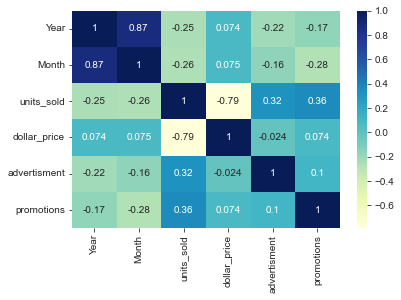

In [17]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
  
# plotting correlation heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  


units_sold vs dollar price r-val is moderately strong and therefore can be a good model but the other two, units_sold vs advertisment AND units_sold vs promotions are very weak therefore not good models  

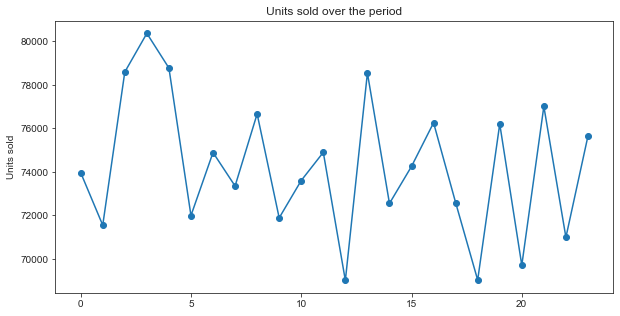

In [18]:
# Plotting the linecharts

# plot size
plt.figure(figsize = (10,5))

# line chart
df["units_sold"].plot(kind = "line", label = "actual_units", marker = "o");


# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period")

# show
plt.show();

#### use linreg to see if there is a clear recommendation

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
df.shape

(24, 6)

In [21]:
df

,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2019,1,73959,8.75,50.04,61.13
1,2019,2,71544,8.99,50.74,60.19
2,2019,3,78587,7.50,50.14,59.16
3,2019,4,80364,7.25,50.27,60.38
4,2019,5,78771,7.40,51.25,59.71
5,2019,6,71986,8.50,50.65,59.88
6,2019,7,74885,8.40,50.87,60.14
7,2019,8,73345,7.90,50.15,60.08
8,2019,9,76659,7.25,48.24,59.90
9,2019,10,71880,8.70,50.19,59.68


In [22]:
df.corr()['units_sold']

Year           -0.252104
Month          -0.257635
units_sold      1.000000
dollar_price   -0.786759
advertisment    0.320547
promotions      0.355050
Name: units_sold, dtype: float64

In [23]:
df.columns

Index(['Year', 'Month', 'units_sold', 'dollar_price', 'advertisment',
       'promotions'],
      dtype='object')

#### creating data variables

In [24]:
x = df.iloc[:, 3:6] # [:(takes all rows), columns 3 thru 6]
print(x)

    dollar_price  advertisment  promotions
0           8.75         50.04       61.13
1           8.99         50.74       60.19
2           7.50         50.14       59.16
3           7.25         50.27       60.38
4           7.40         51.25       59.71
5           8.50         50.65       59.88
6           8.40         50.87       60.14
7           7.90         50.15       60.08
8           7.25         48.24       59.90
9           8.70         50.19       59.68
10          8.40         51.11       59.83
11          8.10         51.49       59.77
12          8.40         50.10       59.29
13          7.40         49.24       60.40
14          8.00         50.04       59.89
15          8.30         49.46       60.06
16          8.10         51.62       60.51
17          8.20         49.78       58.93
18          8.99         48.60       60.09
19          7.99         49.00       61.00
20          8.50         48.00       59.00
21          7.90         54.00       59.50
22         

In [25]:
y = df.iloc[:, 2:3]
print(y)

    units_sold
0        73959
1        71544
2        78587
3        80364
4        78771
5        71986
6        74885
7        73345
8        76659
9        71880
10       73598
11       74893
12       69003
13       78542
14       72543
15       74247
16       76253
17       72582
18       69022
19       76200
20       69701
21       77005
22       70987
23       75643


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [27]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

print("\n")

print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

display(x_train.head())
display(y_train.head())

x_train:  (18, 3)
x_test:  (6, 3)


y_train:  (18, 1)
y_test:  (6, 1)


,dollar_price,advertisment,promotions
14,8.0,50.04,59.89
13,7.4,49.24,60.40
17,8.2,49.78,58.93
5,8.5,50.65,59.88
4,7.4,51.25,59.71


,units_sold
14,72543
13,78542
17,72582
5,71986
4,78771


### Model building

In [28]:
y.mean()

units_sold    74258.291667
dtype: float64

In [29]:
#create and fit the model for prediction
lin = LinearRegression()
lin.fit(x_train, y_train)

predictions = np.round(lin.predict(x_train),1)


y_pred = lin.predict(x_test)

print(y_pred)

[[76667.37170724]
 [75162.05636552]
 [73919.34562826]
 [70471.36668625]
 [79875.85823648]
 [75887.72047577]]


In [30]:
print("R^2: {:.2f}".format(lin.score(x_train, y_train)))


R^2: 0.86


In [38]:
# call the model 
model = LinearRegression()

# fit the model
model.fit(x_train, y_train)

# # calculate the score
print("R^2: {:.2f}".format(model.score(x_train, y_train)))

# make the predictions on train data
predictions = np.round(model.predict(x_train),1)

# accuracy metrics
print("RMSE: {:.2f}".format(mean_squared_error(y_train, predictions, squared = False)))
print("MAE: {:.2f}".format(mean_absolute_error(y_train, predictions))) # the 2f means that its is for 2 decimal

R^2: 0.86
RMSE: 1169.34
MAE: 856.53


In [39]:
#predict using x-values
lin.predict([[8.75, 50.04, 61.13]])

C:\Users\miche\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[73468.66019376]])

#### Train data predictions

In [47]:
# combine the actual data and predictions
output = pd.DataFrame({"actual": y_train, 
                       "predictions": predictions})

# sort the index
output = output.sort_index()

# new output
output.head()

ValueError: Per-column arrays must each be 1-dimensional

In [42]:
output.shape

NameError: name 'output' is not defined

In [109]:
df.shape

(24, 6)

In [35]:
# creating a df with test data and predictions

test_output = pd.DataFrame({"actual": y_test, 
                           "test_predictions": test_predictions})

# sorting index
test_output = test_output.sort_index()
test_output.head()

NameError: name 'test_predictions' is not defined

#####  units sold is close to the actual value 

In [34]:
#train data predictions: combine the actual data and predictions

output = pd.DataFrame({"actual": y_train, 
                       "predictions": predictions})

# sort the index
output = output.sort_index()

# new output
output.head()

ValueError: Per-column arrays must each be 1-dimensional

In [70]:
#evaluate the model thru R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.7121974318061657

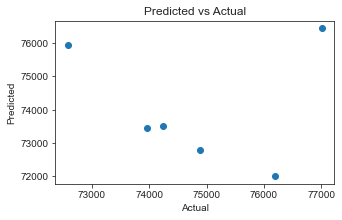

In [71]:
#plot the results
plt.figure(figsize = (5, 3))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.scatter(y_test, y_pred);

In [72]:
x_train.shape, y_train.shape

((18, 3), (18, 1))

In [73]:
x_train

,dollar_price,advertisment,promotions
14,8.00,50.04,59.89
20,8.50,48.00,59.00
22,7.99,48.70,58.00
8,7.25,48.24,59.90
11,8.10,51.49,59.77
16,8.10,51.62,60.51
23,8.25,50.00,60.50
9,8.70,50.19,59.68
4,7.40,51.25,59.71
12,8.40,50.10,59.29


In [74]:
#print predicted values of the model by putting values in dataframe
#pred_y_df2 = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Differennce':y_test - y_pred})
#pred_y_df2

sklearn_model = LinearRegression().fit(x_train,y_train)
sklearn_y_predictions = sklearn_model.predict(x_train)
sklearn_y_predictions


array([[74711.50653914],
       [69162.3518287 ],
       [70764.17044981],
       [77361.73434338],
       [75054.09932604],
       [76331.41944759],
       [74339.54223017],
       [70797.66586743],
       [78470.73794082],
       [71689.38759583],
       [78102.03462426],
       [68761.08448757],
       [72507.57484411],
       [76252.8671609 ],
       [70486.98497891],
       [75622.41843069],
       [79614.19758775],
       [73291.2223169 ]])

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train)

(955.1267251977956, 1593751.83973449)

In [76]:
#predictions_df = pd.DataFrame({'Dollar_price':df['dollar_price'], 'Advertisment':df['advertisment'], 'Promotions':df['promotions'], 'Sklearn Price predictions':sklearn_y_predictions})
#predictions_df

In [77]:
#df['sklearn_y_predictions'] =pd.Series('sklearn_y_predictions')
#df.insert(6, 'sklearn_y_predictions', True)
#df['split'] = df['sklearn_y_predictions'].str[:2]
#df.drop('sklearn_y_predictions', inplace=True, axis=1)

In [78]:
df

,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2019,1,73959,8.75,50.04,61.13
1,2019,2,71544,8.99,50.74,60.19
2,2019,3,78587,7.50,50.14,59.16
3,2019,4,80364,7.25,50.27,60.38
4,2019,5,78771,7.40,51.25,59.71
5,2019,6,71986,8.50,50.65,59.88
6,2019,7,74885,8.40,50.87,60.14
7,2019,8,73345,7.90,50.15,60.08
8,2019,9,76659,7.25,48.24,59.90
9,2019,10,71880,8.70,50.19,59.68


In [79]:
df.dtypes

Year              int64
Month             int64
units_sold        int64
dollar_price    float64
advertisment    float64
promotions      float64
dtype: object

### creating model 

In [80]:
#create coefficients
coef = lin.coef_
components = pd.DataFrame(zip(x.columns, coef), columns = ['component', 'value'])
components = components.append({'component':'intercept', 'value':lin.intercept_}, ignore_index = True)

C:\Users\miche\AppData\Local\Temp\ipykernel_18336\1875323608.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append({'component':'intercept', 'value':lin.intercept_}, ignore_index = True)


In [81]:
print(coef)

[[-5187.34408176   650.91848914  1877.37446561]]


In [82]:
print(components)

      component                                              value
0  dollar_price  [-5187.344081763065, 650.9184891432907, 1877.3...
1     intercept                              [-28513.797336252625]


In [83]:
print(intercept)

NameError: name 'intercept' is not defined